In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [12]:
un_data=pd.read_csv('UNRATE.csv')
un_data.dropna(inplace=True)

In [13]:
un_data.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


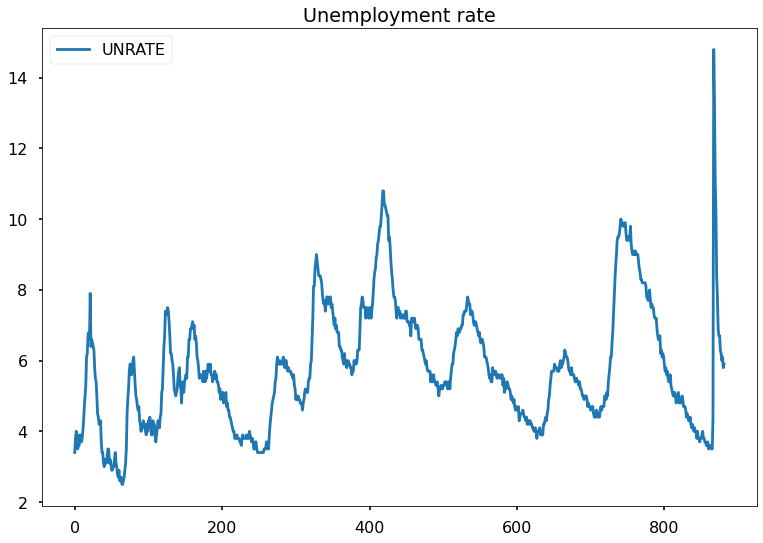

In [14]:
#plot data
un_data.plot()
plt.title('Unemployment rate')
plt.show()

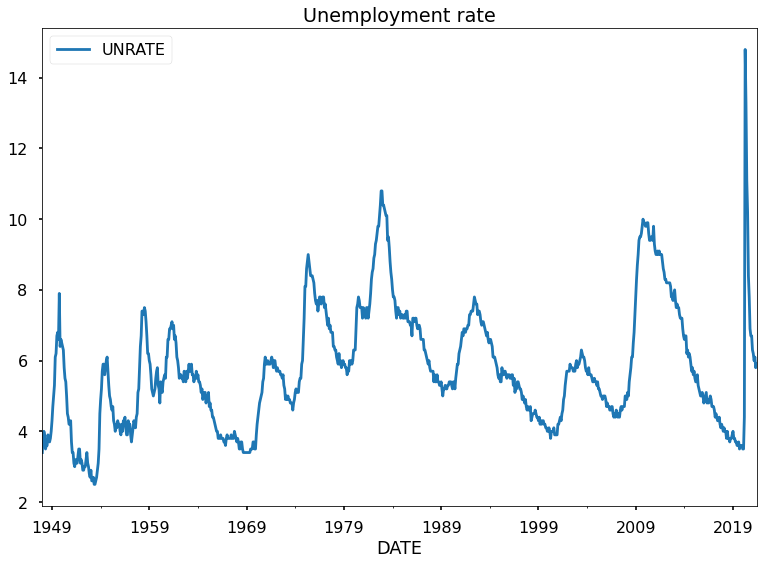

In [15]:
un_data.index = pd.to_datetime(un_data.DATE)
un_data.plot()
plt.title('Unemployment rate')
plt.show()

In [17]:


# Resampling to daily frequency

un_data = un_data.resample('D').mean()

# Resampling to monthly frequency
un_data_month = un_data.resample('M').mean()

# Resampling to annual frequency
un_data_year = un_data.resample('A-DEC').mean()

# Resampling to quarterly frequency
un_data_Q = un_data.resample('Q-DEC').mean()

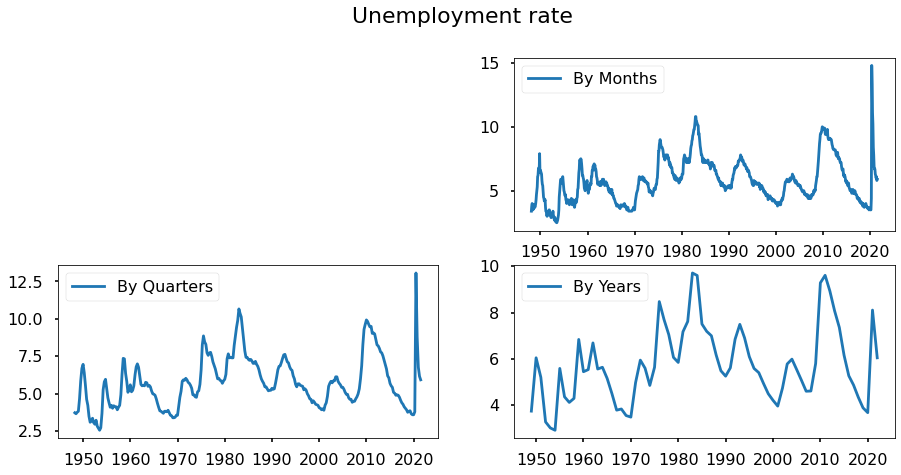

In [58]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Unemployment rate', fontsize=22)


plt.subplot(222)
plt.plot(un_data_month.UNRATE, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(un_data_Q.UNRATE, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(un_data_year.UNRATE, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [21]:
#I will predict by years



# Stationarity check and STL-decomposition of the series

Dickey–Fuller test: p=0.006066


<Figure size 1080x504 with 0 Axes>

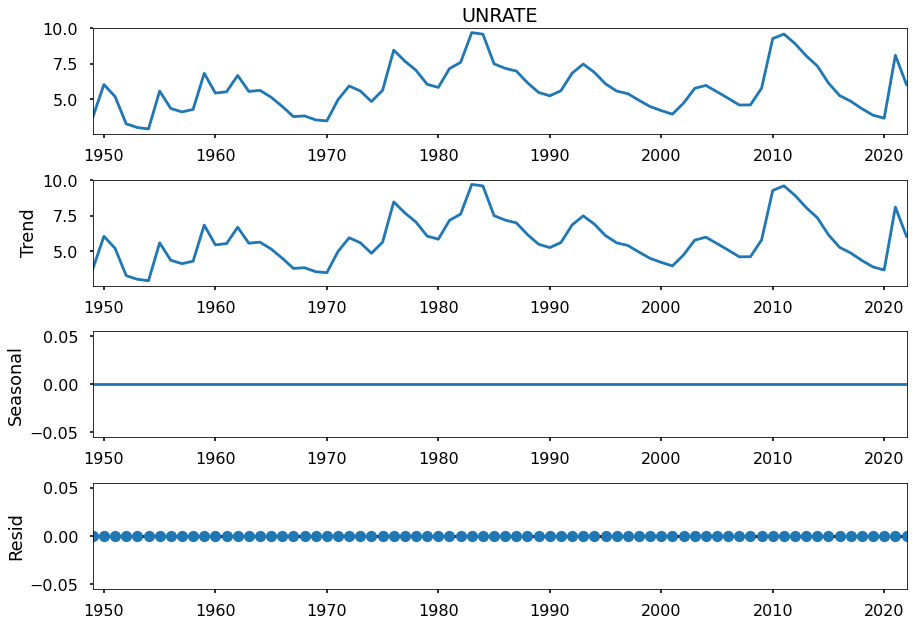

In [23]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(un_data_year.UNRATE).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(un_data_year.UNRATE)[1])
plt.show()

# the series is stationary

# ARIMA Model Selection¶


## Evaluate ARIMA model

In [36]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [59]:
#iterate arima parameters
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return

In [38]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(un_data_year.UNRATE, p_values, d_values, q_values)
1
2
3
4
5
6
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(un_data_year.UNRATE, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=2.891
ARIMA(0, 0, 1) MSE=1.669
ARIMA(0, 0, 2) MSE=1.496
ARIMA(0, 1, 0) MSE=1.732
ARIMA(0, 1, 1) MSE=1.839
ARIMA(0, 1, 2) MSE=1.836
ARIMA(0, 2, 0) MSE=3.252
ARIMA(0, 2, 1) MSE=1.758
ARIMA(0, 2, 2) MSE=1.871
ARIMA(1, 0, 0) MSE=1.518
ARIMA(1, 0, 1) MSE=1.513
ARIMA(1, 0, 2) MSE=1.565
ARIMA(1, 1, 0) MSE=1.797
ARIMA(1, 1, 1) MSE=1.794
ARIMA(1, 1, 2) MSE=1.623
ARIMA(1, 2, 0) MSE=2.789
ARIMA(1, 2, 1) MSE=1.833
ARIMA(1, 2, 2) MSE=1.702
ARIMA(2, 0, 0) MSE=1.514
ARIMA(2, 0, 1) MSE=1.554
ARIMA(2, 0, 2) MSE=1.574
ARIMA(2, 1, 0) MSE=1.842
ARIMA(2, 1, 1) MSE=1.647
ARIMA(2, 1, 2) MSE=1.660
ARIMA(2, 2, 0) MSE=2.634
ARIMA(2, 2, 1) MSE=1.873
ARIMA(2, 2, 2) MSE=1.764
ARIMA(4, 0, 0) MSE=1.600
ARIMA(4, 0, 1) MSE=1.597
ARIMA(4, 0, 2) MSE=1.576
ARIMA(4, 1, 0) MSE=1.845
ARIMA(4, 1, 1) MSE=1.690
ARIMA(4, 1, 2) MSE=1.566
ARIMA(4, 2, 0) MSE=2.552
ARIMA(4, 2, 1) MSE=1.880
ARIMA(4, 2, 2) MSE=1.771
ARIMA(6, 0, 0) MSE=1.612
ARIMA(6, 0, 1) MSE=1.454
ARIMA(6, 0, 2) MSE=1.453
ARIMA(6, 1, 0) MSE=1.790


Bestmodel: ARIMA(8,0,1)

Rolling Forecast

predicted=5.836326, expected=5.408333
predicted=5.498865, expected=4.941667
predicted=5.079898, expected=4.500000
predicted=4.686243, expected=4.216667
predicted=4.556538, expected=3.966667
predicted=4.272343, expected=4.741667
predicted=5.079781, expected=5.783333
predicted=5.788796, expected=5.991667
predicted=5.757335, expected=5.541667
predicted=5.384968, expected=5.083333
predicted=5.324892, expected=4.608333
predicted=4.778440, expected=4.616667
predicted=4.969583, expected=5.800000
predicted=5.928040, expected=9.283333
predicted=9.209503, expected=9.608333
predicted=7.954013, expected=8.933333
predicted=8.016533, expected=8.075000
predicted=7.231402, expected=7.358333
predicted=7.379346, expected=6.158333
predicted=5.268683, expected=5.275000
predicted=5.857919, expected=4.875000
predicted=4.582260, expected=4.350000
predicted=5.004371, expected=3.891667
predicted=3.721661, expected=3.683333
predicted=4.562219, expected=8.108333
predicted=8.383674, expected=6.050000
Test RMSE: 1

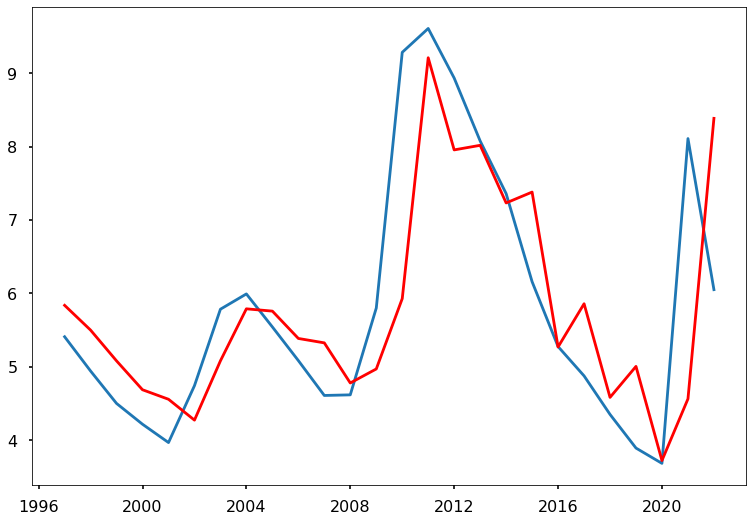

In [57]:

# split into train and test sets
X = un_data_year.UNRATE
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(8,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
predictions=pd.Series(predictions, index=test.index)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()